<a href="https://colab.research.google.com/github/lsmanoel/pythonLearningAndDeepLearning/blob/master/Tensorflow/CNN/Tensorflow_WaveRecognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# from google.colab import drive 
# drive.mount('/content/gdrive')

In [0]:
!pip install sounddevice

---
# Global Config

In [0]:
import numpy as np

fs = 256
Ts = 1/fs
NFFT = int(fs/2)  # the length of the windowing segments
N = fs
t=np.linspace(0, Ts*N, N)

plotAllData = True

wave_data_list = []


---
# White Noise Generator

The **Normal** (or **Gaussian** or ** Gauss** or **Laplace–Gauss**) distribution:

$$\varphi(x|\mu, \sigma²)=\frac{1}{\sqrt{2 \pi \sigma}}e^{-\frac{(x-\mu)^2}{2 \sigma²}}$$

where:

*   $\mu$ (micro)  is the **mean** or **expectation** of the distribution (and also its median and mode).
*   $\sigma$ (sigma) is the **standard deviation**.
*   $\sigma²$ is the **variance**.

![alt text](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/350px-Normal_Distribution_PDF.svg.png)



In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

t=np.linspace(0, Ts*N, N)

# size of x axis, mean and standard deviation
micro, sigma = 0, 0.1
wng_power = 1.4
wng_wave = wng_power*np.random.normal(micro, sigma, N)
print(wng_wave.shape)

(256,)


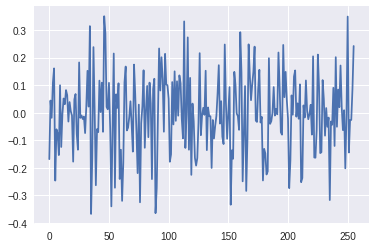

In [0]:
import matplotlib.pyplot as plt

plotThisData = False

if plotAllData or plotThisData:
  plt.plot(wng_wave)
else:
  print("Plot Disabled")


In [0]:
for micro in range(10):
  for sigma in range(200):
    for wng_power in range(10):
        wng_generated = (wng_power/50)*np.random.normal(micro-5.0, sigma/5, N)
        wave_data_list.append((wng_generated, 0))

In [0]:
len(wave_data_list)

20000

---
# Sine Wave

In [0]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# size of x axis, mean and standard deviation
sig_power = 1
freq = 10
sin_wave = sig_power*np.sin(2*np.pi*freq*t)
wng_wave = 0.1*np.random.normal(0, 0.1, N)
print(sin_wave.shape)

(256,)


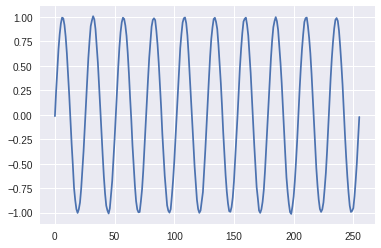

In [0]:
import matplotlib.pyplot as plt

plotThisData = False

if plotAllData or plotThisData:
  plt.plot(sin_wave+wng_wave)
else:
  print("Plot Disabled")

**Sine Wave Dataset Generator:**

In [0]:
for freq in range(20):
  for sigma in range(10):
    for wng_power in range(10):
      for sig_power in range (10):
        sin_generated = (sig_power)*np.sin(2*np.pi*(1+freq/400)*t)
        wng_generated = (wng_power/50)*np.random.normal(0.0, sigma/5, N)
        wave_data_list.append((sin_generated*wng_generated, 1))

In [0]:
len(wave_data_list)

40000

---
# Square Wave

In [0]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# size of x axis, mean and standard deviation
sig_power = 1
freq = 1
square_wave = sig_power*signal.square(2*np.pi*freq*t)
print(square_wave.shape)

(256,)


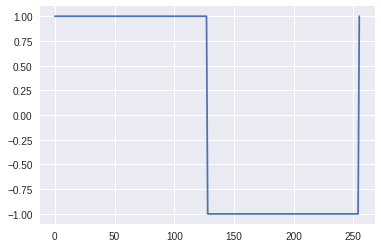

In [0]:
import matplotlib.pyplot as plt

plotThisData = False

if plotAllData or plotThisData:
  plt.plot(square_wave)
else:
  print("Plot Disabled")


**Square Wave Dataset Generator:**

In [0]:
for freq in range(20):
  for sigma in range(10):
    for wng_power in range(10):
      for sig_power in range (10):
        square_generated = (sig_power)*np.square(2*np.pi*(1+freq/400)*t/10)
        wng_generated = (wng_power/50)*np.random.normal(0.0, sigma/5, N)
        wave_data_list.append((square_generated*wng_generated, 2))

In [0]:
len(wave_data_list)

60000

---
# Sawtooth Wave

In [0]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# size of x axis, mean and standard deviation
sig_power = 1
freq = 1
sawtooth_wave = sig_power*signal.sawtooth(2*np.pi*freq*t)
print(sawtooth_wave.shape)

(256,)


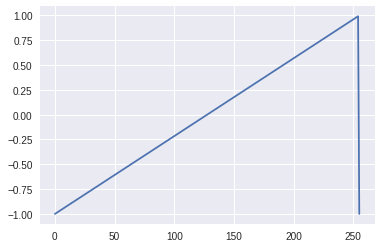

In [0]:
import matplotlib.pyplot as plt

plotThisData = False

if plotAllData or plotThisData:
  plt.plot(sawtooth_wave)
else:
  print("Plot Disabled")


In [0]:
for freq in range(20):
  for sigma in range(10):
    for wng_power in range(10):
      for sig_power in range (10):
        sawtooth_generated = (sig_power)*signal.sawtooth(2*np.pi*(1+freq/400)*t/10)
        wng_generated = (wng_power/100)*np.random.normal(0.0, sigma/5, N)
        wave_data_list.append((sawtooth_generated*wng_generated, 3))

In [0]:
len(wave_data_list)

80000

---
# Chirp Wave

In [0]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# size of x axis, mean and standard deviation
sig_power = 1
freq0 = 1
freq1 = 10
tEnd = 1
chirp_wave = sig_power*signal.chirp(t, f0=freq0, f1=freq1, t1=tEnd,  method='linear')
print(chirp_wave.shape)

(256,)


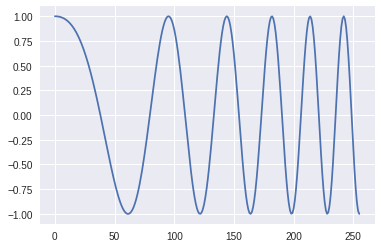

In [0]:
import matplotlib.pyplot as plt

plotThisData = False

if plotAllData or plotThisData:
  plt.plot(chirp_wave)
else:
  print("Plot Disabled")


In [0]:
# for freq in range(10):
#   for sigma in range(20):
#     for wng_power in range(2):
#       for sig_power in range (2):
#         chirp_generated = (sig_power)*signal.chirp(t, 
#                                                       f0=(1+freq/50), 
#                                                       f1=fs/4, 
#                                                       t1=tEnd,  
#                                                       method='linear')
        
#         wng_generated = (sig_power/100)*np.random.normal(0.0, sigma/5, N)
#         wave_data_list.append((chirp_generated*wng_generated, 4))

In [0]:
len(wave_data_list)

80000

---
# Data Preprocessing



In [0]:
print(wave_data_list[0][0].shape[0])

256


In [0]:
import os
import glob
import pandas as pd
import numpy as np
from random import shuffle
from sklearn.model_selection import train_test_split

#===============================================================================
# Data preprocessing:
shuffle(wave_data_list)
N_wave = 4

# for noise_seg in noise_seg_list:
#   print(noise_seg[0], noise_seg[1].shape)  

x_data = np.full((len(wave_data_list), 
                  wave_data_list[0][0].shape[0]),
                 0.0)

y_data = np.full((len(wave_data_list), N_wave), 0.0)

for i, wave_tuple in enumerate(wave_data_list):
  x_data[i][:] = wave_tuple[0]
  y_data[i][:] = np.eye(N_wave)[wave_tuple[1]]
#   print(y_data[i][:], wave_tuple[1])

test_x_data, train_x_data, test_y_data, train_y_data = train_test_split(x_data, 
                                                                        y_data, 
                                                                        test_size=0.25)

print(test_x_data.shape, train_x_data.shape, test_y_data.shape, train_y_data.shape)  

test_data = (test_x_data, test_y_data)
train_data = (train_x_data, train_y_data)

(60000, 256) (20000, 256) (60000, 4) (20000, 4)


**Dataset Iterator and Placeholders:**

In [0]:
import tensorflow as tf

# drop_prob_1 = tf.placeholder(tf.float32)

x = tf.placeholder(tf.float32, shape=[None, 
                                      x_data.shape[1]])
                                      
y_true = tf.placeholder(tf.int64, 
                        shape=[None, N_wave])


BATCH_SIZE = 1
batch_size = tf.placeholder(tf.int64)
train_dataset = tf.data.Dataset.from_tensor_slices((x, y_true)).batch(batch_size).shuffle(buffer_size=batch_size).repeat(None)
test_dataset = tf.data.Dataset.from_tensor_slices((x, y_true)).batch(batch_size).shuffle(buffer_size=batch_size).repeat(None)

# create a iterator of the correct shape and type
iter = tf.data.Iterator.from_structure(train_dataset.output_types,
                                           train_dataset.output_shapes)

features, labels = iter.get_next()

# create the initialisation operations
train_init_op = iter.make_initializer(train_dataset)
test_init_op = iter.make_initializer(test_dataset)

**Helper Functions:**

In [0]:
import tensorflow as tf
import random
from random import shuffle
import numpy as np

#-------------------------------------------------------------------------------
def one_hot_convert(data, N_labels):
  return tf.one_hot(data, N_labels) 

#-------------------------------------------------------------------------------
def init_weights(shape):
  init_random_dist = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(init_random_dist)

#-------------------------------------------------------------------------------
def init_bias(shape):
  init_bias_vals = tf.constant(0.1, shape=shape)
  return tf.Variable(init_bias_vals)

#-------------------------------------------------------------------------------
def conv1d(x, w):
  # x --> [batch, hight, width, channels]
  # y --> [filter hight, filter width, channels in, channels out]
  
  return tf.nn.conv1d(x, w, stride=1, padding='VALID')

#-------------------------------------------------------------------------------
def max_pool(x):
  # x --> [batch, hight, width, channels]
  return tf.nn.max_pool(x, 
                        ksize=[1, 2, 1, 1], 
                        strides=[1, 2, 1, 1], 
                        padding='VALID')

#===============================================================================
#Convolutional 1D Layer Function
def convolutional_1d_layer(input_x, shape):
  w = init_weights(shape)
  b = init_bias([shape[-1]])
  return tf.nn.relu(conv1d(input_x, w) + b)

#-------------------------------------------------------------------------------
#Fully Connected Layer Function
def normal_full_layer(input_layer, size):
  input_size = int(input_layer.get_shape()[1])
  w = init_weights([input_size, size])
  b = init_bias([size])
  return tf.matmul(input_layer, w) + b

**Graph Structure Layers:**

In [0]:
import tensorflow as tf

print(features.shape)

# Spec = tf.spectral.rfft(features, fft_length=[segmentation_Size])
# print(Spec.shape, tf.rank(Spec)) 

# abs_fft = tf.abs(Spec)
# print(abs_fft.shape, tf.rank(abs_fft)) 

#-------------------------------------------------------------------------------
x_input = tf.reshape(features, [-1, features.shape[-1], 1])
print("x_input", x_input.shape, tf.rank(x_input))

nKernel_1 = 10
conv_kernel_layer_1 = convolutional_1d_layer(x_input, shape=[4, 1, nKernel_1])
print("conv_kernel_layer_1", conv_kernel_layer_1.shape, tf.rank(conv_kernel_layer_1)) 

conv_reshape_layer_1 = tf.reshape(conv_kernel_layer_1, [-1, conv_kernel_layer_1.shape[1], 1, nKernel_1])
print("conv_reshape_layer_1", conv_reshape_layer_1.shape, tf.rank(conv_reshape_layer_1)) 

pool_1 = max_pool(conv_reshape_layer_1)
print("pool_1", pool_1.shape, tf.rank(pool_1)) 

#-------------------------------------------------------------------------------
input_layer_2 = tf.reshape(pool_1, [-1, pool_1.shape[1], 1])
print("input_layer_2", input_layer_2.shape, tf.rank(input_layer_2))

nKernel_2 = 5
conv_kernel_layer_2 = convolutional_1d_layer(input_layer_2, shape=[2, 1, nKernel_2])
print("conv_kernel_layer_2", conv_kernel_layer_2.shape, tf.rank(conv_kernel_layer_2)) 

conv_reshape_layer_2 = tf.reshape(conv_kernel_layer_2, [-1, conv_kernel_layer_2.shape[1], 1, nKernel_2])
print("conv_reshape_layer_2", conv_reshape_layer_2.shape, tf.rank(conv_reshape_layer_2)) 

pool_2 = max_pool(conv_reshape_layer_2)
print("pool_2", pool_2.shape, tf.rank(pool_2)) 

#===============================================================================
conv_out = tf.reshape(pool_2, [-1, BATCH_SIZE*nKernel_1*nKernel_2*int(pool_2.shape[1])])
print("conv_out", conv_out.shape, tf.rank(conv_out)) 

fully_connected_layer_1 = tf.nn.relu(normal_full_layer(conv_out, int(conv_out.shape[1])))
print("fully_connected_layer_1", fully_connected_layer_1.shape, tf.rank(fully_connected_layer_1)) 

dropout_layer_1 = tf.nn.dropout(fully_connected_layer_1, keep_prob=0.3)
print("dropout_layer_1", dropout_layer_1.shape, tf.rank(dropout_layer_1)) 

fully_connected_layer_2 = tf.nn.relu(normal_full_layer(dropout_layer_1, N_wave**3))
print("fully_connected_layer_2", fully_connected_layer_2.shape, tf.rank(fully_connected_layer_2)) 

# dropout_layer_2 = tf.nn.dropout(fully_connected_layer_2, keep_prob=0.1)
# print("dropout_layer_2", dropout_layer_2.shape, tf.rank(dropout_layer_2)) 

#-------------------------------------------------------------------------------
y = normal_full_layer(fully_connected_layer_2, N_wave)
print("y", y.shape, tf.rank(y)) 

(?, 256)
x_input (?, 256, 1) Tensor("Rank:0", shape=(), dtype=int32)
conv_kernel_layer_1 (?, 253, 10) Tensor("Rank_1:0", shape=(), dtype=int32)
conv_reshape_layer_1 (?, 253, 1, 10) Tensor("Rank_2:0", shape=(), dtype=int32)
pool_1 (?, 126, 1, 10) Tensor("Rank_3:0", shape=(), dtype=int32)
input_layer_2 (?, 126, 1) Tensor("Rank_4:0", shape=(), dtype=int32)
conv_kernel_layer_2 (?, 125, 5) Tensor("Rank_5:0", shape=(), dtype=int32)
conv_reshape_layer_2 (?, 125, 1, 5) Tensor("Rank_6:0", shape=(), dtype=int32)
pool_2 (?, 62, 1, 5) Tensor("Rank_7:0", shape=(), dtype=int32)
conv_out (?, 3100) Tensor("Rank_8:0", shape=(), dtype=int32)
fully_connected_layer_1 (?, 3100) Tensor("Rank_9:0", shape=(), dtype=int32)
dropout_layer_1 (?, 3100) Tensor("Rank_10:0", shape=(), dtype=int32)
fully_connected_layer_2 (?, 64) Tensor("Rank_11:0", shape=(), dtype=int32)
y (?, 4) Tensor("Rank_12:0", shape=(), dtype=int32)


**Loss Function:**

[Difference Between Sigmoid Function and Softmax Function](http://dataaspirant.com/2017/03/07/difference-between-softmax-function-and-sigmoid-function/)

In [0]:
import tensorflow as tf

print(labels.shape)
# pass the second value from iter.get_net() as label
# loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=tf.cast(labels, tf.float32), logits=tf.cast(y, tf.float32)))
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=labels, logits=y))
# loss = tf.losses.mean_squared_error(y, labels)


(?, 4)


**Optimizer:**

In [0]:
import tensorflow as tf

train_op = tf.train.AdamOptimizer(learning_rate=1e-4, epsilon=1e-5).minimize(loss)

**Net Evaluate Operators:**

In [0]:
import tensorflow as tf

correct_pred = tf.equal(tf.argmax(y, 1), tf.argmax(labels, 1))
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))


# Process Session

**Init Variables:**

In [0]:
import tensorflow as tf

init = tf.global_variables_initializer()

**Session:**

init variables...
init iterator...
Training...
Iter: 20, Loss: 2.589407, acc: 0.150000	||timeStamp: 1548032637.73, timeRate: -1548032636.53
Iter: 40, Loss: 1.893087, acc: 0.250000	||timeStamp: 1.20, timeRate: 0.86
Iter: 60, Loss: 0.920222, acc: 0.450000	||timeStamp: 2.05, timeRate: 0.85
Iter: 80, Loss: 2.167533, acc: 0.150000	||timeStamp: 2.91, timeRate: 0.84
Iter: 100, Loss: 1.904810, acc: 0.400000	||timeStamp: 3.74, timeRate: 0.84


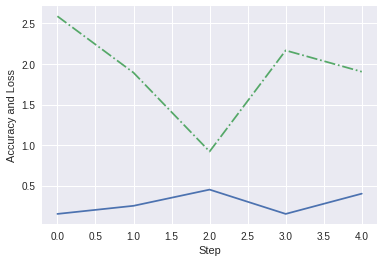

Testing...
Iter: 0, Loss: 2.497794, acc: 0.000000
Iter: 1, Loss: 3.073205, acc: 0.000000
Iter: 2, Loss: 1.769770, acc: 0.000000
Iter: 3, Loss: 2.142908, acc: 0.000000
Iter: 4, Loss: 2.272065, acc: 0.000000
Iter: 5, Loss: 2.263044, acc: 0.000000
Iter: 6, Loss: 4.044357, acc: 0.000000
Iter: 7, Loss: 2.441105, acc: 0.000000
Iter: 8, Loss: 0.364506, acc: 1.000000
Iter: 9, Loss: 0.864292, acc: 1.000000
Iter: 10, Loss: 2.972155, acc: 0.000000
Iter: 11, Loss: 2.771786, acc: 0.000000
Iter: 12, Loss: 2.394578, acc: 0.000000
Iter: 13, Loss: 2.483208, acc: 0.000000
Iter: 14, Loss: 0.426734, acc: 1.000000
Iter: 15, Loss: 1.668514, acc: 0.000000
Iter: 16, Loss: 1.837722, acc: 0.000000
Iter: 17, Loss: 1.150508, acc: 0.000000
Iter: 18, Loss: 0.229594, acc: 1.000000
Iter: 19, Loss: 0.368040, acc: 1.000000
Iter: 20, Loss: 1.648608, acc: 0.000000
Iter: 21, Loss: 1.556707, acc: 0.000000
Iter: 22, Loss: 1.907296, acc: 0.000000
Iter: 23, Loss: 0.909516, acc: 1.000000
Iter: 24, Loss: 1.734649, acc: 0.000000

In [0]:
import time
import numpy as np
import tensorflow as tf


with tf.Session() as sess:
  writer = tf.summary.FileWriter("./Graph", sess.graph)
  print('init variables...')
  sess.run(init)

  # ==========================================================================
  # initialise iterator with train data
  print('init iterator...')
  sess.run(train_init_op, feed_dict = {x : train_data[0], 
                                       y_true: train_data[1],
                                       #drop_prob_1: float(0.3),
                                       batch_size: BATCH_SIZE})


  print('Training...')
  j=0;
  EPOCHS = 100
  printStep = 20
  lossResultList = []
  accResultList = []
  epochList = []

  timeStamp_list = []
  time_rate_list = []
  timeStamp_list.append(time.time())

  for i in range(int(EPOCHS/printStep)):
    tot_loss = 0
    tot_acc = 0
    for _ in range(printStep):
        #print('Training---')
        _, loss_value, acc = sess.run([train_op, loss, accuracy])
        j+=1
        #print('Training:', j)
        tot_acc += acc
        tot_loss += loss_value

    lossResultList.append(tot_loss/printStep)
    accResultList.append(tot_acc/printStep)
    epochList.append(i)
    timeStamp_list.append(time.time() - timeStamp_list[0])
    time_rate_list.append(timeStamp_list[i+1] - timeStamp_list[i])
    print("Iter: {}, Loss: {:.6f}, acc: {:.6f}\t||timeStamp: {:.2f}, timeRate: {:.2f}".format(j, 
                                               tot_loss/printStep, 
                                               tot_acc/printStep,
                                               timeStamp_list[i],
                                               time_rate_list[i]))

  plt.plot(epochList, accResultList, lossResultList, '-.')     
  plt.ylabel('Accuracy and Loss')
  plt.xlabel('Step')
  plt.show() 

  # ==========================================================================
  # initialise iterator with test data
  sess.run(test_init_op, feed_dict = {x : test_data[0], 
                                      y_true: test_data[1],
                                      #drop_prob_1: float(0.3),
                                      batch_size:BATCH_SIZE})

  print('Testing...')
  j=0;
  full_loss = 0
  full_acc = 0
  EPOCHS = 50
  evalResulList = []
  for i in range(EPOCHS):
      tot_loss = 0
      tot_acc = 0
      for _ in range(BATCH_SIZE):
          #print('Training---')
          loss_value, acc = sess.run([loss, accuracy])
          j+=1
          #print('Training:', j)
          tot_acc += acc
          full_acc += acc
          tot_loss += loss_value
          full_loss += loss_value

      evalResulList.append((j, 
                        tot_loss/printStep, 
                        tot_acc/printStep))            
      print("Iter: {}, Loss: {:.6f}, acc: {:.6f}".format(i, 
                                                 tot_loss/BATCH_SIZE, 
                                                 tot_acc/BATCH_SIZE))

  print("Test Loss: {}, acc: {}".format(full_loss/j, full_acc/j))
  writer.close()  
    

In [0]:
!pip install tensorboardcolab
from tensorboardcolab import *
tbc = TensorBoardColab()


Using TensorFlow backend.


Wait for 8 seconds...
TensorBoard link:
http://985e970a.ngrok.io
